In [10]:
import json
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [1]:
path = '/mmdetection/data/scratch/annotations/clean_old_scratch.json'
total_data = json.load(open(path))
print('num of images: ', len(total_data['images']))

num of images:  23473


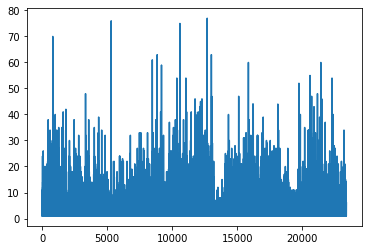

In [3]:
imgToAnns = defaultdict(list)
for ann in total_data['annotations']:
    imgToAnns[ann['image_id']].append(ann)
    
scratch_dist = [len(anns) for anns in imgToAnns.values()]
plt.plot(scratch_dist)

In [6]:
print('average number of scratches per image: ', np.mean(scratch_dist))
print('max number of scratches in an image: ', np.max(scratch_dist))
print('min number of scratches in an image: ', np.min(scratch_dist))


average number of scratches per image:  4.886062419837537
max number of scratches in an image:  77
min number of scratches in an image:  1


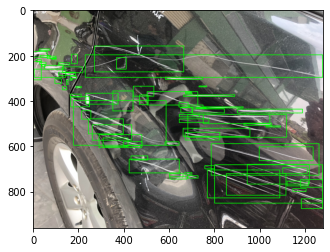

In [13]:
# draw images that have 77 scratches
index = np.argmax(scratch_dist)
img_id = list(imgToAnns.keys())[index]
for img in total_data['images']:
    if img['id'] == img_id:
        img_name = img['file_name']
        break
I = cv2.imread(os.path.join('/mmdetection/data/scratch/images', img_name))
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
anns = imgToAnns[img_id]
for ann in anns:
    box = ann['bbox']
    box = [int(ele) for ele in box]
    cv2.rectangle(I, (box[0],box[1]), (box[0]+box[2],box[1]+box[3]), (0,255,0), 2)
plt.imshow(I)

In [31]:
import pandas as pd
eval_metric = pd.read_csv('/mmdetection/demo/output_data/eval_metrics.csv')
print(eval_metric)
eval_metric.drop(labels=6, axis=0,inplace=True)
eval_metric

      model    TP    FP     FN  Precision mean  Recall mean  F1_score mean  \
0    v1_7_6  8328  8932  10030        0.463668     0.493627       0.427373   
1   v2_13_6  8248  9133  10110        0.451929     0.490042       0.420533   
2   v3_15_6  8325  9111  10033        0.458840     0.494714       0.425824   
3   v4_16_6  4275  8142  14083        0.288647     0.283950       0.249056   
4   v8_22_6  8249  8767  10109        0.464018     0.489716       0.426548   
5   v9_25_6  6816  4952  11542        0.500513     0.414487       0.408008   
6   v8_22_6  8249  8767  10109        0.464018     0.489716       0.426548   
7  v12_30_6  8325  8833  10033        0.461009     0.498070       0.429387   
8  v13_01_7  8427  8898   9931        0.462031     0.499227       0.429897   

   no_scratches  
0         18455  
1         18553  
2         18582  
3         14899  
4         18238  
5         12278  
6         18238  
7         18424  
8         18428  


,model,TP,FP,FN,Precision mean,Recall mean,F1_score mean,no_scratches
0,v1_7_6,8328,8932,10030,0.463668,0.493627,0.427373,18455
1,v2_13_6,8248,9133,10110,0.451929,0.490042,0.420533,18553
2,v3_15_6,8325,9111,10033,0.458840,0.494714,0.425824,18582
3,v4_16_6,4275,8142,14083,0.288647,0.283950,0.249056,14899
4,v8_22_6,8249,8767,10109,0.464018,0.489716,0.426548,18238
5,v9_25_6,6816,4952,11542,0.500513,0.414487,0.408008,12278
7,v12_30_6,8325,8833,10033,0.461009,0.498070,0.429387,18424
8,v13_01_7,8427,8898,9931,0.462031,0.499227,0.429897,18428


In [32]:
eval_metric.to_csv('/mmdetection/demo/output_data/eval_metrics.csv', index=False)

In [34]:
eval_metric

,model,TP,FP,FN,Precision mean,Recall mean,F1_score mean,no_scratches
0,v1_7_6,8328,8932,10030,0.463668,0.493627,0.427373,18455
1,v2_13_6,8248,9133,10110,0.451929,0.490042,0.420533,18553
2,v3_15_6,8325,9111,10033,0.458840,0.494714,0.425824,18582
3,v4_16_6,4275,8142,14083,0.288647,0.283950,0.249056,14899
4,v8_22_6,8249,8767,10109,0.464018,0.489716,0.426548,18238
5,v9_25_6,6816,4952,11542,0.500513,0.414487,0.408008,12278
7,v12_30_6,8325,8833,10033,0.461009,0.498070,0.429387,18424
8,v13_01_7,8427,8898,9931,0.462031,0.499227,0.429897,18428


In [ ]:
v1_7_6 v2_13_6 v3_15_6 v4_16_6 v8_22_6 v12_30_6  v9_25_6

In [35]:
eval_metric = pd.read_csv('/mmdetection/demo/output_data/eval_metrics.csv', index_col='model')

new_metric_table = eval_metric.loc[['v1_7_6', 'v2_13_6', 'v3_15_6', 'v4_16_6', 'v8_22_6', 'v12_30_6', 'v13_01_7', 'v9_25_6']]
new_metric_table

,TP,FP,FN,Precision mean,Recall mean,F1_score mean,no_scratches
model,,,,,,,
v1_7_6,8328,8932,10030,0.463668,0.493627,0.427373,18455
v2_13_6,8248,9133,10110,0.451929,0.490042,0.420533,18553
v3_15_6,8325,9111,10033,0.458840,0.494714,0.425824,18582
v4_16_6,4275,8142,14083,0.288647,0.283950,0.249056,14899
v8_22_6,8249,8767,10109,0.464018,0.489716,0.426548,18238
v12_30_6,8325,8833,10033,0.461009,0.498070,0.429387,18424
v13_01_7,8427,8898,9931,0.462031,0.499227,0.429897,18428
v9_25_6,6816,4952,11542,0.500513,0.414487,0.408008,12278


In [40]:
precision = new_metric_table['Precision mean'].values
recall = new_metric_table['Recall mean'].values
f1 = new_metric_table['F1_score mean'].values


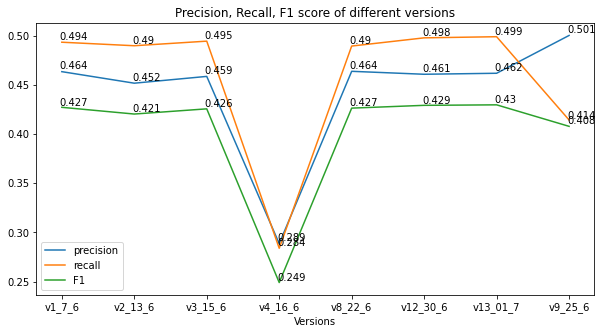

In [57]:
labels = ['v1_7_6', 'v2_13_6', 'v3_15_6', 'v4_16_6', 'v8_22_6', 'v12_30_6', 'v13_01_7', 'v9_25_6']
x = range(len(labels))
plt.figure(figsize = (10,5))
plt.plot(x,precision, label = 'precision')
for i, value in enumerate(precision):
    value = round(value,3)
    plt.annotate(str(value), xy = (i,value), xytext=(-2,2),textcoords='offset points')

plt.plot(x,recall, label = 'recall')
for i, value in enumerate(recall):
    value = round(value,3)
    plt.annotate(str(value), xy = (i,value), xytext=(-2,2),textcoords='offset points')

plt.plot(x,f1, label = 'F1')
for i, value in enumerate(f1):
    value = round(value,3)
    plt.annotate(str(value), xy = (i,value), xytext=(-2,2),textcoords='offset points')

plt.xticks(x, labels)
plt.xlabel('Versions')
plt.title('Precision, Recall, F1 score of different versions')
plt.legend()
plt.show()

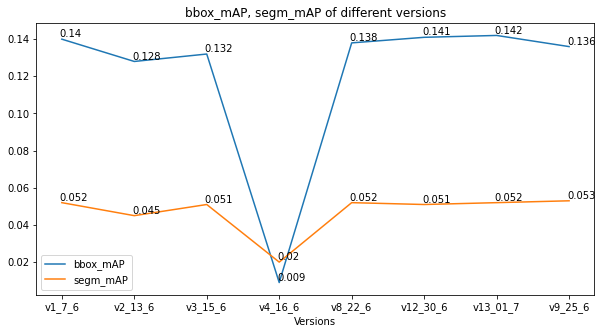

In [59]:
mAP_box = [0.1400, 0.1280, 0.1320, 0.0090, 0.1380, 0.1410, 0.1420, 0.1360]
mAP_segm = [0.0520, 0.0450, 0.0510, 0.0200,0.0520, 0.0510, 0.0520, 0.0530]

labels = ['v1_7_6', 'v2_13_6', 'v3_15_6', 'v4_16_6', 'v8_22_6', 'v12_30_6', 'v13_01_7', 'v9_25_6']
x = range(len(labels))
plt.figure(figsize = (10,5))
plt.plot(x,mAP_box, label = 'bbox_mAP')
for i, value in enumerate(mAP_box):
    value = round(value,3)
    plt.annotate(str(value), xy = (i,value), xytext=(-2,2),textcoords='offset points')

plt.plot(x,mAP_segm, label = 'segm_mAP')
for i, value in enumerate(mAP_segm):
    value = round(value,3)
    plt.annotate(str(value), xy = (i,value), xytext=(-2,2),textcoords='offset points')
plt.xticks(x, labels)
plt.xlabel('Versions')
plt.title('bbox_mAP, segm_mAP of different versions')
plt.legend()
plt.show()